# Assignment 02

In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
transform = transforms.Compose([#transforms.Resize((1,10000)),
                                transforms.Grayscale(),		# the code transforms.Graysclae() is for changing the size [3,100,100] to [1, 100, 100] (notice : [channel, height, width] )
                                transforms.ToTensor(),])


#train_data_path = 'relative path of training data set'
train_data_path = 'horse-or-human/train'
trainset = torchvision.datasets.ImageFolder(root=train_data_path, transform=transform)
# print(trainset)
# change the valuse of batch_size, num_workers for your program
# if shuffle=True, the data reshuffled at every epoch 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=False, num_workers=1)  


validation_data_path = 'horse-or-human/validation'
valset = torchvision.datasets.ImageFolder(root=validation_data_path, transform=transform)
# change the valuse of batch_size, num_workers for your program
valloader = torch.utils.data.DataLoader(valset, batch_size=1, shuffle=False, num_workers=1)  

In [3]:
train_data = np.zeros((10000, 0))
train_label = np.zeros((0,1))
val_data = np.zeros((10000,0))
val_label = np.zeros((0,1))

# load training images of the batch size for every iteration
for i, data in enumerate(trainloader):

    # inputs is the image
    # labels is the class of the image
    inputs, labels = data
    
    # if you don't change the image size, it will be [batch_size, 1, 100, 100]
#     train_data = np.hstack((train_data, inputs[0][0].reshape(10000,1)))
    train_data = np.hstack((train_data, np.reshape(inputs, (10000,1))))
    
    # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
    train_label = np.append(train_label, labels)

train_label = train_label.reshape(1,1027)
print(train_label.shape)
print(train_data.shape)


# load validation images of the batch size for every iteration
for i, data in enumerate(valloader):

    # inputs is the image
    # labels is the class of the image
    inputs, labels = data

    # if you don't change the image size, it will be [batch_size, 1, 100, 100]
    val_data = np.hstack((val_data, np.reshape(inputs, (10000,1))))

    # if labels is horse it returns tensor[0,0,0] else it returns tensor[1,1,1]
    val_label = np.append(val_label, labels)

val_label = val_label.reshape(1,256)
print(val_label.shape)
print(val_data.shape)

(1, 1027)
(10000, 1027)
(1, 256)
(10000, 256)


In [4]:
LEARNING_RATE = 0.002
NUM_EPOCH = 5000
NUM_TRAIN_DATA = 1027
NUM_VAL_DATA = 256

w = np.zeros((10000, 1))
b = 0

train_loss = np.zeros((2,NUM_EPOCH))
train_accuracy = np.zeros((2,NUM_EPOCH))
val_loss = np.zeros((2,NUM_EPOCH))
val_accuracy = np.zeros((2,NUM_EPOCH))
elapsed_time = np.zeros((2, NUM_EPOCH))

for i in range(NUM_EPOCH):
    start_time = time.time()
    J = 0
    dw = np.zeros((10000, 1))
    dz = 0
    
    z = np.dot(w.T, train_data) + b
    A = 1/(1 + np.exp(-z))
    
    dz = A - train_label
#     print(dz.shape)
    dw = np.dot(dz, train_data.T) / NUM_TRAIN_DATA
#     print(dw.shape)
    db = np.sum(dz) / NUM_TRAIN_DATA
#     print(db.shape)
#     print(db)
    
    w = w - LEARNING_RATE * dw.reshape(10000,1)
    b = b - LEARNING_RATE * db 
    
    elapsed_time[0][i] = i+1
    elapsed_time[1][i] = time.time() - start_time
    
    # FOR CALCULATING TRAIN LOSS
    J = (np.dot(train_label, (np.log(A)).T) + np.dot(1-train_label, (np.log(1-A)).T))
    J = -np.sum(J)/NUM_TRAIN_DATA
    train_loss[0][i] = i+1
    train_loss[1][i] = J
    
    # FOR TRAIN ACCURACY
    for x in range(NUM_TRAIN_DATA):
        if A[0][x] >= 0.5:
            A[0][x] = 1
        else:
            A[0][x] = 0
    
    correct = 0
    for x in range(NUM_TRAIN_DATA):
        if A[0][x] == train_label[0][x]:
            correct += 1
        
    train_accuracy[0][i] = i+1
    train_accuracy[1][i] = correct/NUM_TRAIN_DATA
    
    # FOR CALCULATING TEST LOSS
    z = np.dot(w.T, val_data) + b
    A = 1/(1 + np.exp(-z))
    
    J = (np.dot(val_label, (np.log(A)).T) + np.dot(1-val_label, (np.log(1-A)).T))
    J = -np.sum(J)/NUM_VAL_DATA
    val_loss[0][i] = i+1
    val_loss[1][i] = J
    
    # FOR TEST ACCURACY
    for x in range(NUM_VAL_DATA):
        if A[0][x] >= 0.5:
            A[0][x] = 1
        else:
            A[0][x] = 0
    
    correct = 0
    for x in range(NUM_VAL_DATA):
        if A[0][x] == val_label[0][x]:
            correct += 1
        
    val_accuracy[0][i] = i+1
    val_accuracy[1][i] = correct/NUM_VAL_DATA

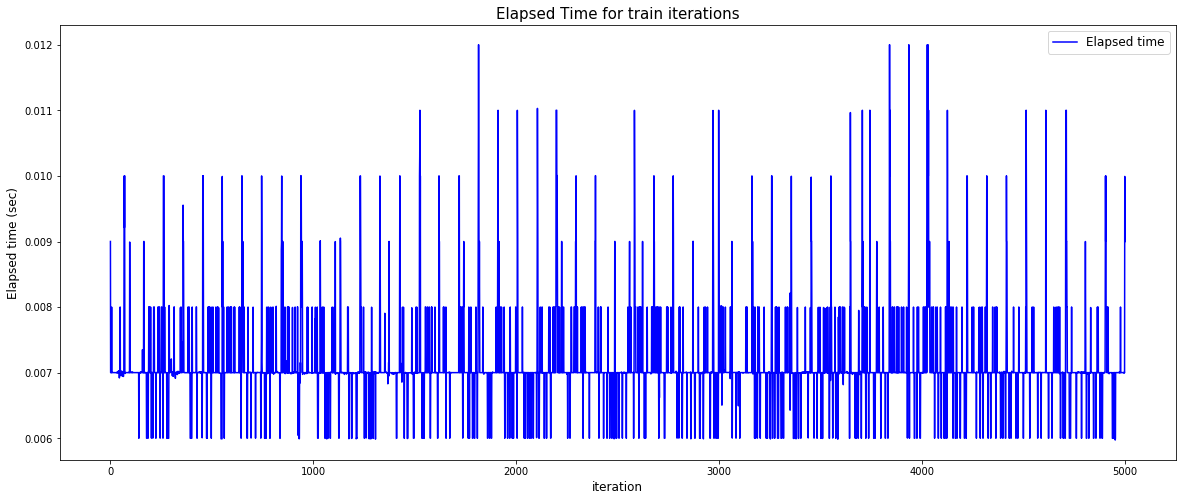

In [5]:
plt.figure(figsize=(20,8))
plt.title("Elapsed time at every iteration", fontsize="15")
plt.xlabel("iteration", fontsize='12')
plt.ylabel("Elapsed time (sec)", fontsize='12')
plt.plot(elapsed_time[0], elapsed_time[1], '-b', label='Elapsed time')
plt.legend(fontsize='12')
plt.show()

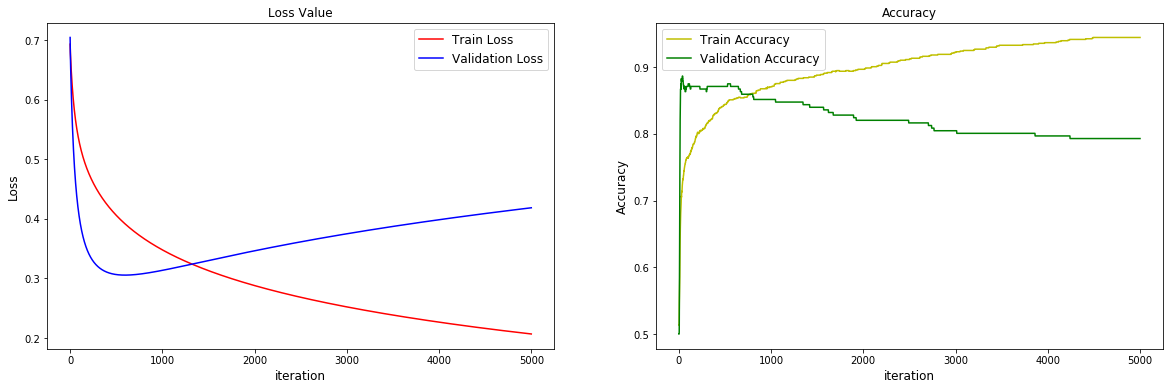

In [6]:
# PLOT TRAINING AND TESTING LOSS AT EVERY ITERATION
fig, ax2 = plt.subplots(1,2,figsize=(20,6))
ax2[0].set_title("Loss Value")
ax2[0].set_ylabel("Loss", fontsize="12")
ax2[0].set_xlabel("iteration", fontsize="12")
ax2[0].plot(train_loss[0], train_loss[1],'-r', label='Train Loss')
ax2[0].plot(val_loss[0], val_loss[1], '-b', label='Validation Loss')
ax2[0].legend(fontsize="12")

# PLOT TRAINING AND TESTING ACCURACY AT EVERY ITERATION
ax2[1].set_title("Accuracy")
ax2[1].set_ylabel("Accuracy", fontsize="12")
ax2[1].set_xlabel("iteration", fontsize="12")
ax2[1].plot(train_accuracy[0], train_accuracy[1], '-y', label='Train Accuracy')
ax2[1].plot(val_accuracy[0], val_accuracy[1], '-g', label='Validation Accuracy')
ax2[1].legend(fontsize="12")
plt.show()